In [27]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing the data
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# sex --> 1 - M, 0 - F
# cp --> chest pain (0,1,2,3)
# trestbps --> When a patient is resting, what's his blood pressure
# chol --> cholestrol level
# fbs --> Blood sugar level when the person is fasting
# restecg --> when a person is resting, what's his ecg
# thalach --> Maximum heart rate achieved
# exang --> chest pain for the people who hit gym very often. 0 -. NO CP, 1 -> CP
# oldpeak --> these are values of crest and trough of ecg
# slope --> slope values
# ca --> Maximum no. of major blood vessels --> 0,1,2,3
# thal --> 0,1,2
#         Genetic disorder
#         0 --> no genetic disorder
#         1 --> ganetic disorder(fixed effect)
#         2 --> genetic disorder(reversible)
# target --> whether the person is having a heart disease or not
#       0 --> The person is not having heart disease
#       1 --> The person is having a heart disease

In [4]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [6]:
df['oldpeak'].value_counts()

0.0    99
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
1.9     5
0.5     5
3.6     4
2.2     4
2.4     3
0.9     3
3.4     3
4.0     3
0.3     3
2.3     2
3.2     2
2.5     2
4.2     2
1.1     2
3.1     1
0.7     1
3.5     1
6.2     1
1.3     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: oldpeak, dtype: int64

In [7]:
df.shape

(303, 14)

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#col-- object--- fill the nan values by the mode of the col
#col-- num-- fill the nan values by mean/median

In [ ]:
# 20, 30,25, 79,10,2, 70, (50-60), 80, 2

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [13]:
df[df['chol']>300].shape

(43, 14)

In [14]:
df[df['chol']>300].count()

age         43
sex         43
cp          43
trestbps    43
chol        43
fbs         43
restecg     43
thalach     43
exang       43
oldpeak     43
slope       43
ca          43
thal        43
target      43
dtype: int64

In [15]:
df[(df['chol']>300) & (df['age']>40)].shape

(42, 14)

In [16]:
f=df[df['thal']==2]
f

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0


In [17]:
f[f['target']==1].shape

(130, 14)

In [18]:
# stats analysis
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 1.0, 'Age distribuition')

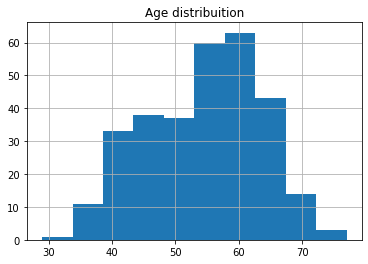

In [19]:
df['age'].hist(grid=True, bins=10) 
plt.title('Age distribuition')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

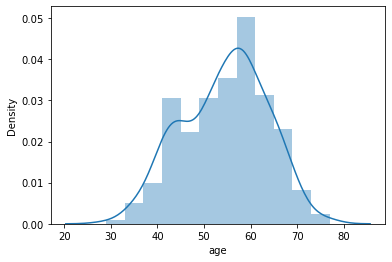

In [20]:
sns.distplot(df['age'])

In the above graph, we can analyse the distribution of Age column, and we can say that there are 60+ people who are having age between 57 to 63.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


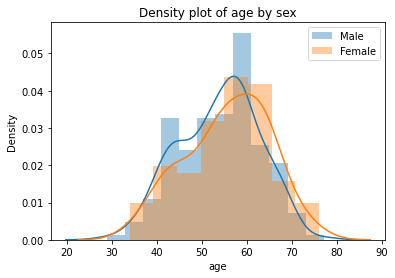

In [21]:
sns.distplot(df[df['sex']==1]['age'],  label='Male')
sns.distplot(df[df['sex']==0]['age'], label='Female')
plt.legend()
plt.title('Density plot of age by sex')
plt.show()

Density graph shows the smoothed distribution of points along the numerical axis. The density peaks where there is the highest concentration of points. In sum, density graphs can be considered smoothed histograms.

Text(0.5, 1.0, 'Resting Blood pressure distribuition')

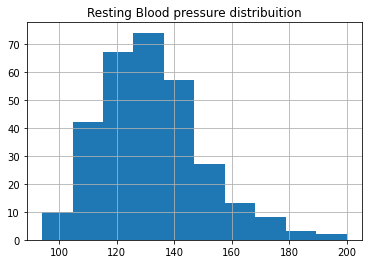

In [25]:
df['trestbps'].hist()
plt.title('Resting Blood pressure distribuition')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


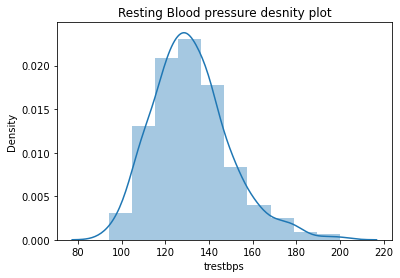

In [26]:
sns.distplot(df['trestbps'], bins=10)
plt.title('Resting Blood pressure desnity plot');

In the above graph, it is almost having a normal distribution 

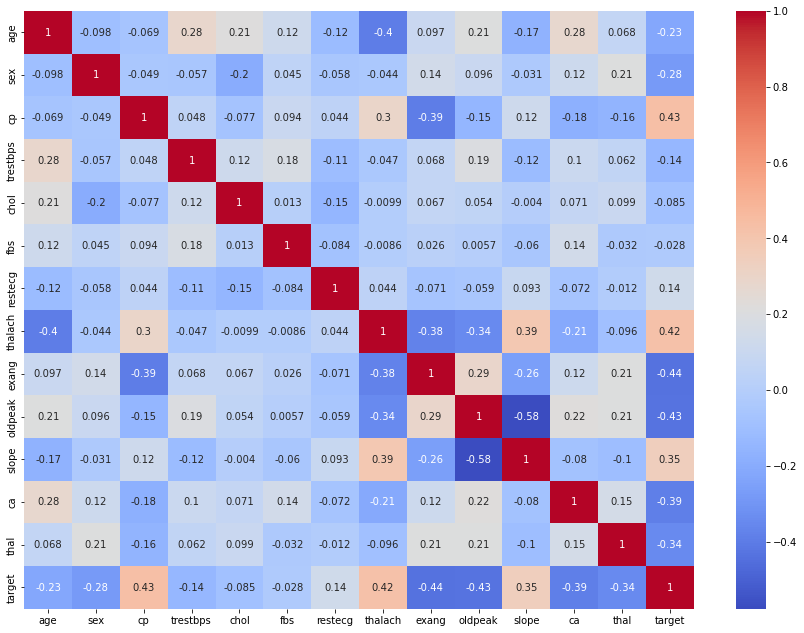

In [23]:
plt.figure(figsize = (15,11))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

<AxesSubplot:xlabel='oldpeak'>

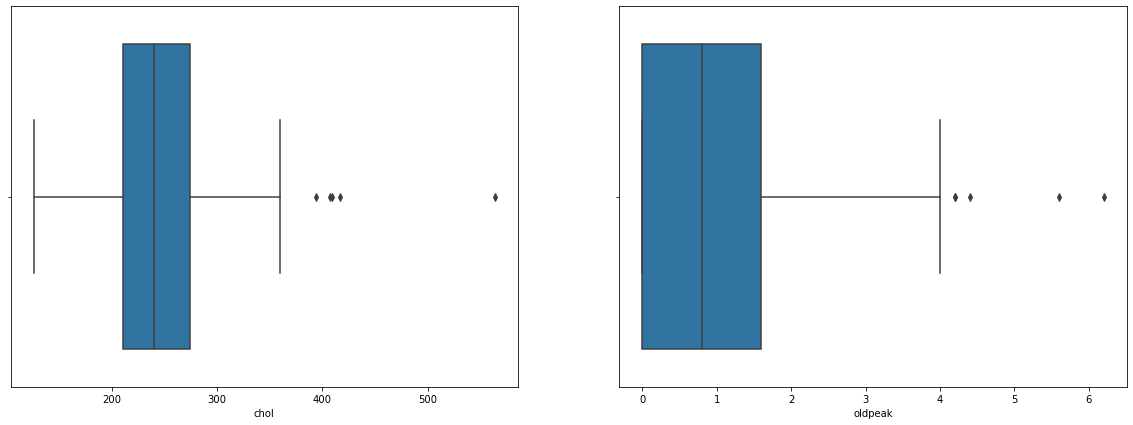

In [30]:
fig, axes = plt.subplots(nrows = 1, ncols=2)  # plt.subplots(2,1)
sns.boxplot(x='chol', data=df, ax=axes[0])
sns.boxplot(x='oldpeak', data=df, ax=axes[1])

In [ ]:
# Outliers are not that much in these columns
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3-Q1

In [ ]:
# data>=q1-1.5*IQR or data<=q3+1.5*IQR

In [ ]:
#iqr method of handing outliers
#lower limit-- q1-1.5*IQR
#upper limit-- q3+1.5*IQR

In [ ]:
#upper limit-- mean+3*std   # for column-wise 
#lower limit-- mean-3*std

Text(0.5, 1.0, 'Count of target feature by sex')

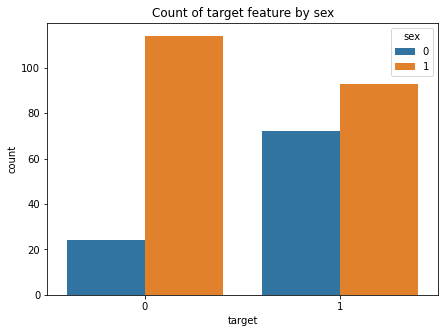

In [31]:
sns.countplot(x='target', hue='sex', data=df);
plt.title('Count of target feature by sex')

The amount of healthy male people is greater than the amount of unhealthy. For women, the number of unhealthy women is higher.

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#supervised model building part-- classification model
#independent and dependent data
#divide the data into train and test set
#create your model
#train your model
#test your model-- predict()
#performance of the model-- accuracy score, confusion matrix, classification_report

In [26]:
X = df.iloc[:, :-1]#independent variable should always be in a dataframe format(2D) data
y = df['target']#dependent or target value
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [ ]:
#x=100
#y=100

In [ ]:
#df
#age  cp  gender trestbps target
#20    200  0      1       1
#89    300  1      0       0


In [ ]:
#x_train-- remaining 70% of x 
#y_train-- remaining 70% of y
#x_test-- 30%of x== 30 records from the df and store those values in x_test
#y_test-- 30%of y== 30 records from the df and store those values in y_test

In [29]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=34, train_size=0.7)
print(x_train.shape)
print(x_test.shape)

(212, 13)
(91, 13)


In [30]:
# random_ state --> It will help in selecting the same pattern each and every time.

In [31]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3


In [32]:
y_train

214    0
84     1
64     1
82     1
26     1
      ..
139    1
35     1
85     1
246    0
122    1
Name: target, Length: 212, dtype: int64

In [ ]:
# DecisionTreeClassifier -- work with classification problem
# DecisionTreeRegressor-- work with regression problem

In [33]:
clf = tree.DecisionTreeClassifier() #we are creating a decision tree model which is untrained
clf.fit(x_train,y_train) # training the model


DecisionTreeClassifier()

In [34]:
#testing the model--
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [35]:
y_train_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [36]:
y_test_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [37]:
y_test

56     1
297    0
262    0
170    0
74     1
      ..
298    0
249    0
229    0
80     1
79     1
Name: target, Length: 91, dtype: int64

In [44]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 1.0
Test score 0.8351648351648352


In [ ]:
accuracy_score(y_test_pred,y_test)

In [39]:
confusion_matrix(y_test_pred,y_test)

array([[34, 10],
       [ 6, 41]], dtype=int64)

In [ ]:
#               Acutal Values
#Predicted        1   0
#             1  TP  FP
#             0  FN  TN 

In [40]:
c_parameter_name = 'max_depth'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df1 = pd.DataFrame(columns=['max_depth', 'accuracy'])
df1

,max_depth,accuracy


In [1]:
#for the 1st loop, input_parameter will 1
#inside the for loop, it will create a dt model with 1 as the max depth value:
#model = tree.DecisionTreeClassifier(max_depth=1)

In [41]:
for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(max_depth=input_parameter)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)*100
    df1= df1.append({'max_depth' : input_parameter , 'accuracy' : acc_score}, ignore_index=True) 
df1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13576\3638717824.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1= df1.append({'max_depth' : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13576\3638717824.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1= df1.append({'max_depth' : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13576\3638717824.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1= df1.append({'max_depth' : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13576\3638717824.py:6: FutureWarning: The frame.append method is de

,max_depth,accuracy
0,1.0,76.923077
1,2.0,79.120879
2,3.0,84.615385
3,4.0,80.21978
4,5.0,80.21978
5,6.0,83.516484
6,7.0,81.318681
7,8.0,81.318681
8,9.0,82.417582
9,10.0,81.318681


In [42]:
model = tree.DecisionTreeClassifier(max_depth=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)*100

In [43]:
acc_score

76.92307692307693

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74        41
           1       0.78      0.80      0.79        50

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91

